In [22]:
from pathlib import Path

from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

root_path = Path().cwd().parent.parent
data_path = root_path / "common" / "resources" / "datasets"
figures_path = Path().resolve() / "figures"

In [23]:
def prepare_dataset(dataset: pd.DataFrame) -> pd.DataFrame:
    dataset = dataset[dataset.User_Score != "tbd"]
    dataset["User_Score"] = dataset["User_Score"].astype("float")
    dataset.columns = [col.lower() for col in dataset.columns]
    dataset["year_of_release"] = pd.to_datetime(dataset["year_of_release"], format="%Y")
    return dataset

In [24]:
dataset_path = data_path / "games.csv"
df = pd.read_csv(dataset_path)
df = prepare_dataset(df)

/var/folders/88/v121ppv51ll0mnt90th9d_4r0000gp/T/ipykernel_23484/4005787621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["User_Score"] = dataset["User_Score"].astype("float")
/var/folders/88/v121ppv51ll0mnt90th9d_4r0000gp/T/ipykernel_23484/4005787621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["year_of_release"] = pd.to_datetime(dataset["year_of_release"], format="%Y")


In [25]:
df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.dtypes

name                       object
platform                   object
year_of_release    datetime64[ns]
genre                      object
publisher                  object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
global_sales              float64
critic_score              float64
critic_count              float64
user_score                float64
user_count                float64
developer                  object
rating                     object
dtype: object

Let's analyse how global sales distributed in our dataset. To plot distributions using matplotlib, we can use the `hist` method of Axes object.

(array([1.4213e+04, 5.8000e+01, 1.3000e+01, 7.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e-02, 8.2620e+00, 1.6514e+01, 2.4766e+01, 3.3018e+01,
        4.1270e+01, 4.9522e+01, 5.7774e+01, 6.6026e+01, 7.4278e+01,
        8.2530e+01]),
 <BarContainer object of 10 artists>)

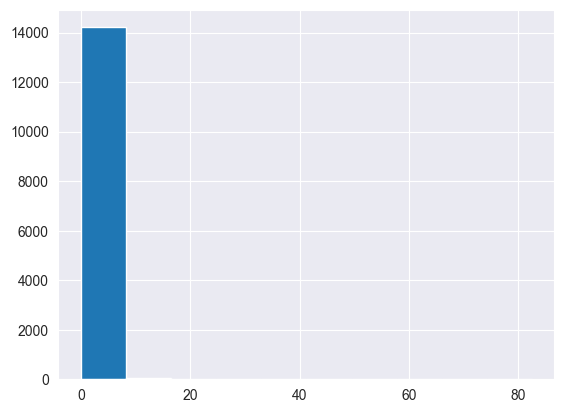

In [27]:
fig, ax = plt.subplots()

ax.hist(data=df, x="global_sales")

This plot is not informative at all. Let's try to make it better looking, by setting `bins` parameter, and by scaling the x-axis logarithmically.

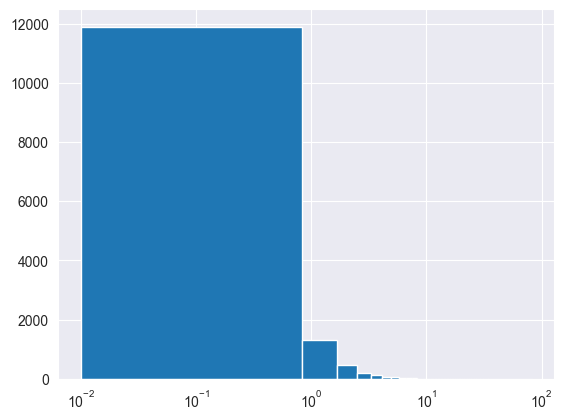

In [28]:
fig, ax = plt.subplots()

ax.hist(data=df, x="global_sales", bins=100)

ax.set_xscale("log")

The plot looks wierd, but more informative right now! The weirdness can be fixed by setting bins manually, as matplotlib, unlike seaborn, cannot handle logarithmic scaling of X axis.

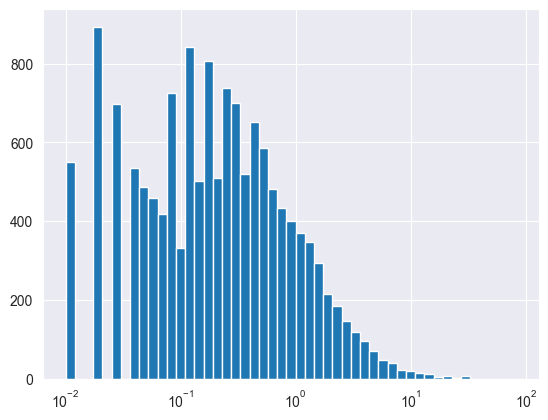

In [29]:
fig, ax = plt.subplots()

logarithmic_bins = np.logspace(np.log10(df["global_sales"].min()), np.log10(df["global_sales"].max()), 50)

ax.hist(data=df, x="global_sales", bins=logarithmic_bins)

ax.set_xscale("log")

Way better! But now let's get back to huge values which in the dataset and analyse them, trying to determine the range that we need.


In [30]:
df.global_sales.describe()

count    14294.000000
mean         0.592050
std          1.662656
min          0.010000
25%          0.060000
50%          0.190000
75%          0.540000
max         82.530000
Name: global_sales, dtype: float64

Yes, as we predicted, while the mean and std are about 0.6, 1, the maximum value is about 82! For further analysis let's select the values which lay in the range until 95 percentile (or quantile 0.95).


(array([7911., 2325., 1169.,  630.,  457.,  382.,  248.,  200.,  128.,
         129.]),
 array([0.01 , 0.232, 0.454, 0.676, 0.898, 1.12 , 1.342, 1.564, 1.786,
        2.008, 2.23 ]),
 <BarContainer object of 10 artists>)

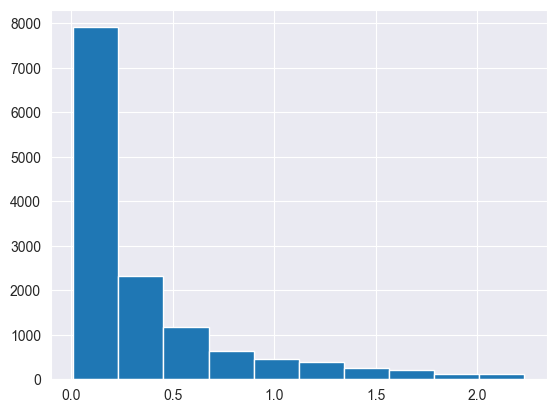

In [31]:
fig, ax = plt.subplots()

df_filtered = df[df.global_sales <= df.global_sales.quantile(0.95)]

ax.hist(data=df_filtered, x="global_sales")

Great, we even can see a distribution. But besides determining the distribution type and its parameters, we can do nothing valuable here. Let's use the same techniques to compare distributions! For now let's try to compare sales in 2 different regions: `eu` and `jp`.

(array([9594.,  928.,  605.,  446.,  307.,  289.,  221.,  172.,  124.,
         148.,  109.,   87.,   91.,   91.,   92.,   68.,   43.,   59.,
          48.,   64.]),
 array([0.    , 0.0205, 0.041 , 0.0615, 0.082 , 0.1025, 0.123 , 0.1435,
        0.164 , 0.1845, 0.205 , 0.2255, 0.246 , 0.2665, 0.287 , 0.3075,
        0.328 , 0.3485, 0.369 , 0.3895, 0.41  ]),
 <BarContainer object of 20 artists>)

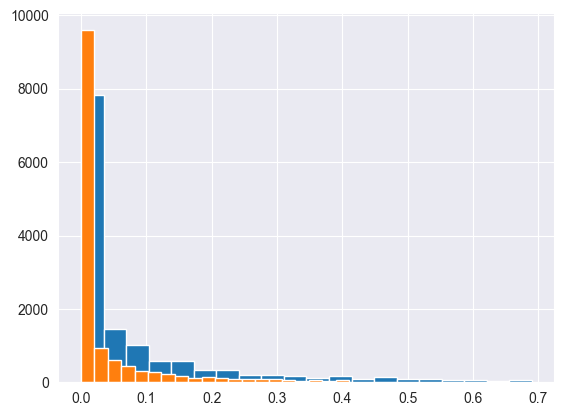

In [32]:
fig, ax = plt.subplots()

df_selected_eu = df[df.eu_sales <= df.eu_sales.quantile(0.95)]
ax.hist(data=df_selected_eu, x="eu_sales", bins=20)

df_selected_jp = df[df.jp_sales <= df.jp_sales.quantile(0.95)]
ax.hist(data=df_selected_jp, x="jp_sales", bins=20)

In the figure above we just plot two distributions above each other. From the first side it could look ok, but here is an invisible problem: when we are plotting the counts, visually we can see difference, while in reality there is not difference in actual distributions. To avoid it, we can consider comparing "probabilities". For this, let's set `weights` parameter of the `hist` method in order to normalize the histograms. Let's also stylize our plot and add legend, axis labels and plot title

Text(0.5, 1.0, 'Distributions of sales in EU and JP regions')

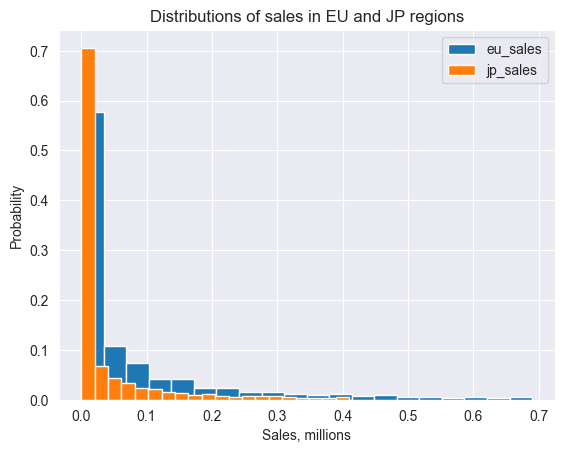

In [33]:
fig, ax = plt.subplots()

df_selected_eu = df[df.eu_sales <= df.eu_sales.quantile(0.95)]
weights = np.ones_like(df_selected_eu["eu_sales"]) / len(df_selected_eu["eu_sales"])
ax.hist(data=df_selected_eu, x="eu_sales", bins=20, weights=weights)

df_selected_jp = df[df.jp_sales <= df.jp_sales.quantile(0.95)]
weights = np.ones_like(df_selected_jp["jp_sales"]) / len(df_selected_jp["jp_sales"])
ax.hist(data=df_selected_jp, x="jp_sales", bins=20, weights=weights)

ax.legend()
ax.set_xlabel("Sales, millions")
ax.set_ylabel("Probability")
ax.set_title("Distributions of sales in EU and JP regions")

Now let's make our histograms look more attractive. The main tool here is preprocessing the dataset, so that bins of both histograms are the same.

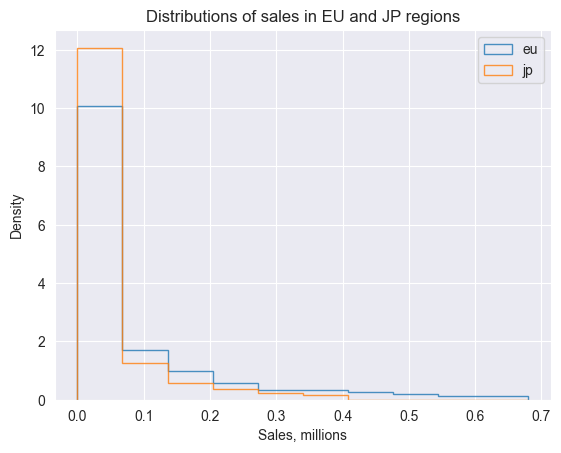

In [34]:
needed_regions = ("eu_sales", "jp_sales")
df_tmp = df[[col for col in df.columns if "sales" in col and col in needed_regions]]
df_melted = df_tmp.melt(var_name="region", value_name="sales")
df_melted["region"] = df_melted["region"].apply(lambda x: x.split("_")[0])

# Quantile filtering
thresholds = df_melted.groupby("region")["sales"].quantile(0.95)
result_df = pd.DataFrame()

for region, threshold in thresholds.items():
    filtered_df = df_melted[(df_melted["region"] == region) & (df_melted["sales"] < threshold)]
    result_df = pd.concat([result_df, filtered_df])

all_data = result_df["sales"]
min_val, max_val = all_data.min(), all_data.max()

bins_count = 10
bins = np.linspace(min_val, max_val, bins_count + 1)

fig, ax = plt.subplots()
for region in result_df["region"].unique():
    data_region = result_df.loc[result_df["region"] == region, "sales"]
    ax.hist(
        data_region,
        bins=bins,
        histtype="step",
        density=True,
        label=region,
        alpha=0.8,
    )
ax.legend()
ax.set_xlabel("Sales, millions")
ax.set_ylabel("Density")
ax.set_title("Distributions of sales in EU and JP regions")
plt.show()

Also, as we discussed in the first week, distributions could be excellent addition to another visualization techniques to explain the data from another point of view

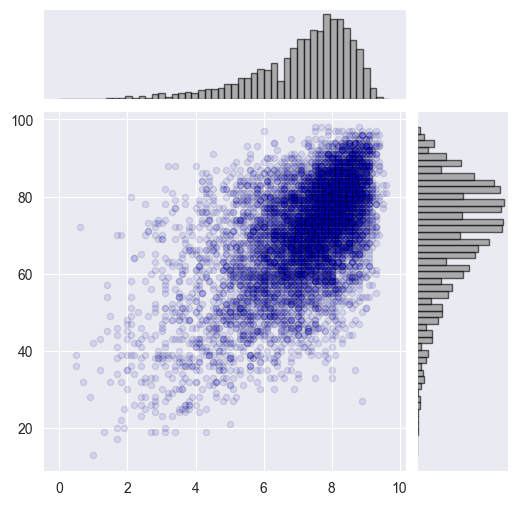

In [37]:
col1, col2 = "user_score", "critic_score"

fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], wspace=0.05, hspace=0.05)

ax_histx = plt.subplot(gs[0, 0])
ax_histx.hist(x=col1, data=df, bins=50, color="gray", alpha=0.6, edgecolor="black")
ax_histx.set_xticks([])
ax_histx.set_yticks([])

ax_histy = plt.subplot(gs[1, 1])
ax_histy.hist(x=col2, data=df, bins=50, orientation="horizontal", color="gray", alpha=0.6, edgecolor="black")
ax_histy.set_xticks([])
ax_histy.set_yticks([])

ax_scatter = plt.subplot(gs[1, 0])
ax_scatter.scatter(x=col1, y=col2, data=df, alpha=0.1, color="blue", edgecolors="black", s=20)

ax_scatter.set_xlim(ax_histx.get_xlim())
ax_scatter.set_ylim(ax_histy.get_ylim())

plt.show()

Now, let's add linear regression plot, approximating scatter plot, as we did at the first week. Let's also add some stylization to the plot: add axis labels for `ax_scatter`, add for the same object legend with titles: `["Linear fit", "Data points"]`, and add title to `x` axis distribution: `"Distributions of User and Critic Scores"`

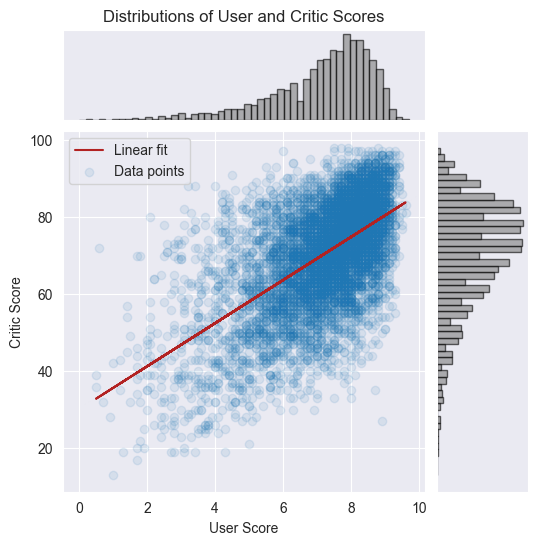

In [36]:
col1, col2 = "user_score", "critic_score"

fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], wspace=0.05, hspace=0.05)

ax_histx = plt.subplot(gs[0, 0])
ax_histx.hist(x=col1, data=df, bins=50, color="gray", alpha=0.6, edgecolor="black")
ax_histx.set_xticks([])
ax_histx.set_yticks([])

ax_histy = plt.subplot(gs[1, 1])
ax_histy.hist(x=col2, data=df, bins=50, orientation="horizontal", color="gray", alpha=0.6, edgecolor="black")
ax_histy.set_xticks([])
ax_histy.set_yticks([])

ax_scatter = plt.subplot(gs[1, 0])

# Drop NaNs in dataFrame
df_clean = df[np.isfinite(df[col1]) & np.isfinite(df[col2])]

# Copied code from the 1st week
coef = np.polyfit(df_clean[col1].values, df_clean[col2].values, 1)
poly1d_fn = np.poly1d(coef)

ax_scatter.plot(df_clean[col1].unique(), poly1d_fn(df_clean[col1].unique()), color="firebrick")
ax_scatter.scatter(x=col1, y=col2, data=df, alpha=0.1)

ax_scatter.set_xlim(ax_histx.get_xlim())
ax_scatter.set_ylim(ax_histy.get_ylim())

ax_scatter.set_xlabel("User Score")
ax_scatter.set_ylabel("Critic Score")
ax_scatter.legend(["Linear fit", "Data points"])

ax_histx.set_title("Distributions of User and Critic Scores")

plt.show()